-----------

# House Prices Assignment - Advanced Regression

### 1)

In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
train = pd.read_csv('train.csv',sep = ',')

In [3]:
# checking the data at tail
train.head(-1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2)
Observations regarding our dataset so far -
- Our Dataset is having 1460 Rows 
- Around 80 columns.
- Seemingly 4 coulmns have more than 80% null values i.e (1- (non-null values)/1460)>0.8.
    - **The columns 'Alley', 'PoolQC', 'MiscFeature' have 94%, ~100%, 96% null values, resp.**
    - However we will check the Data description file before deleting/imputing.
- Most important to note some columns have categorical variables with 'int' or 'float' datatype.
    - Eg 'MSSubClass', 'OverallQual', 'OverallCond'
    - **Categorical Varibales labelled as 'int' will give incorrect analysis if we don't change their type.**

In [6]:
#doubtDF = train['Alley', 'PoolQC', 'MiscFeature','Fence'].copy() 
doubtDF = pd.concat([train.pop(x) for x in ['PoolQC', 'MiscFeature']], axis=1)
train=train.drop(['Id'], axis=1)

#### Plotting Heatmap, to guide our process ahead, where we analyze by column.

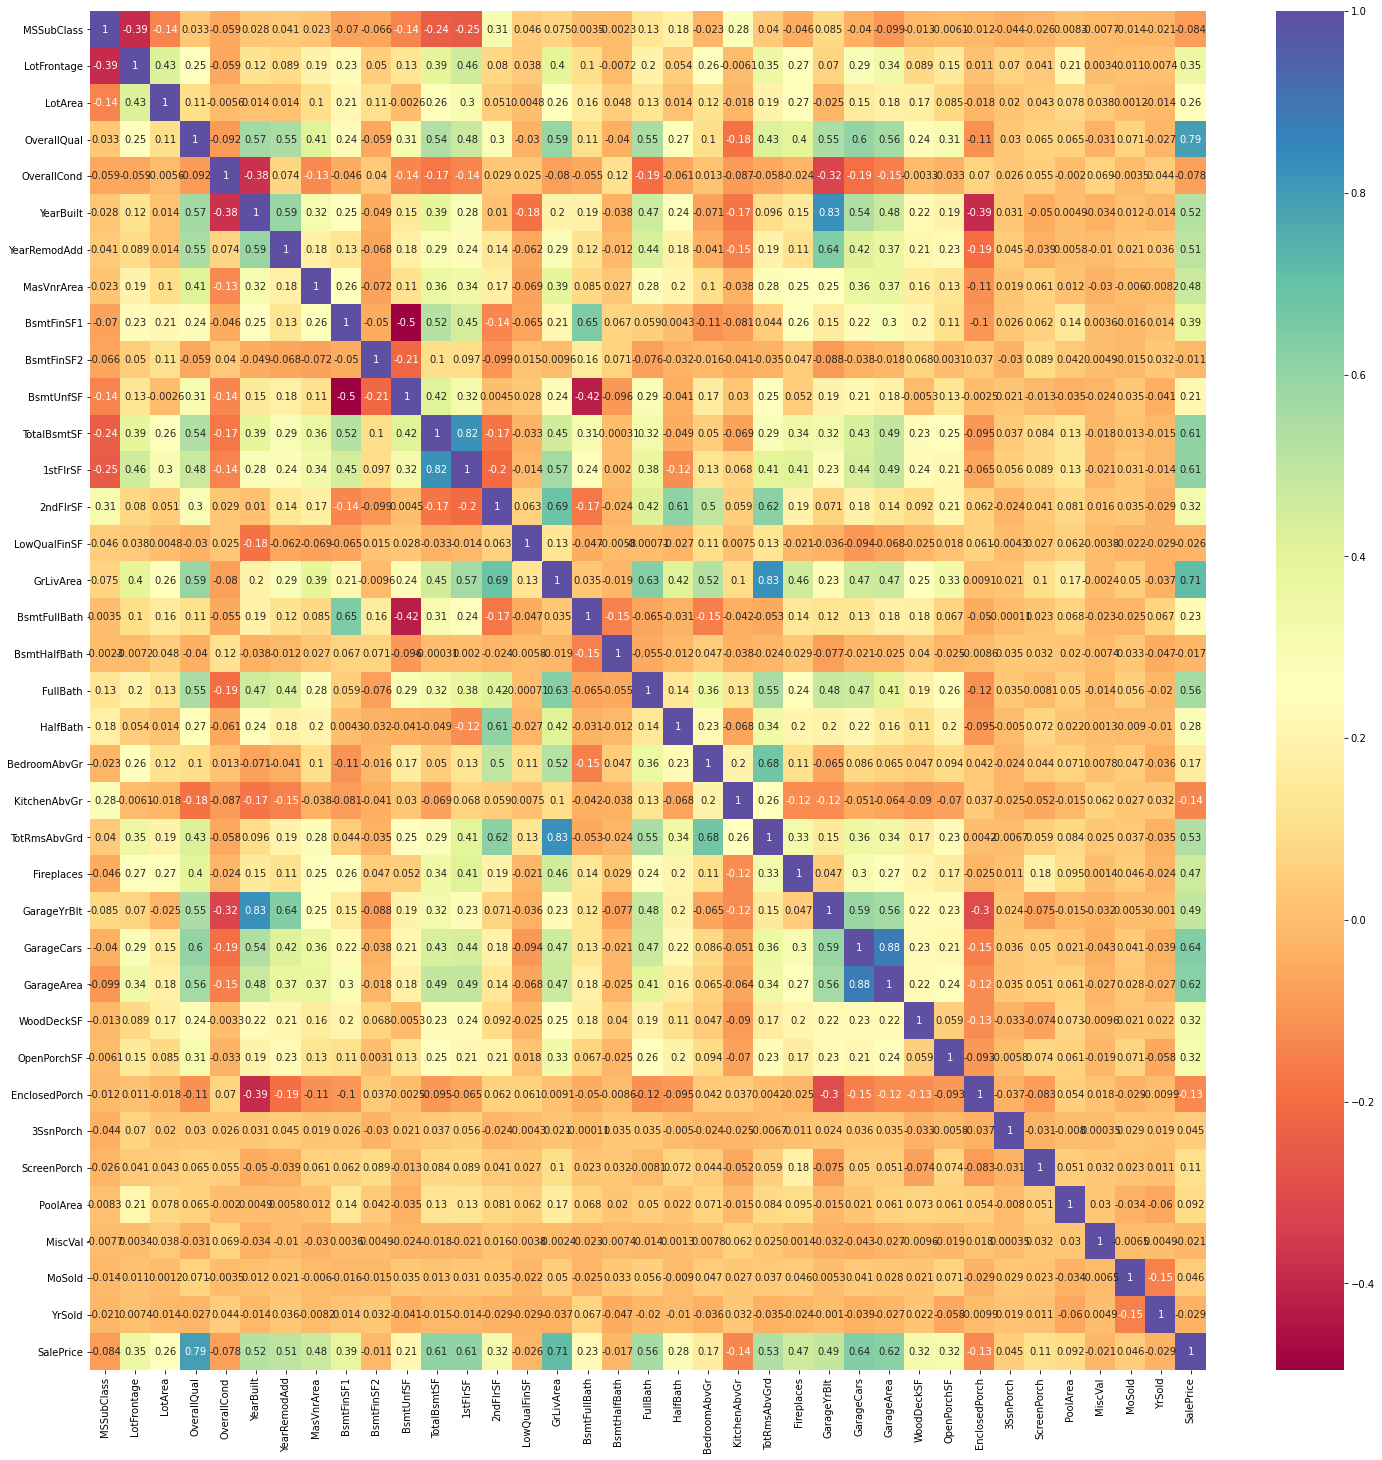

In [7]:
plt.figure(figsize = (25, 25))
sns.heatmap(train.corr(), cmap="Spectral", annot = True)
plt.show()

In [8]:
# Running basic statisitical analysis on the  dataset
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 3) Splitting the dataset into numeric df and a categorical df to evaluate the column datatypes

In [9]:
# We create a numeric df and a categorical df
train_numeric = train.select_dtypes(include=['int64', 'float64']).copy()

In [10]:
train_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


**In the Numeric DF we see that some of the columns marked numeric types eg int & float dtype are actually  categorical. Which is confirmed by using the data description text file.**

So let us take a deeper dive, into 3 such numeric columns looking at their contents.

In [11]:
train['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [12]:
train['OverallQual'].value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64>

In [13]:
train['OverallCond'].value_counts

<bound method IndexOpsMixin.value_counts of 0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64>

##### Using value_counts() and the Data description file we have confirmed these 3 columns should be categorical.

In [14]:
# Hence we will drop them from numeric df
train_numeric = train_numeric.drop(['MSSubClass','OverallQual','OverallCond'], axis = 1)

In [15]:
train_numeric.head(-1)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,62.0,7500,2004,2005,0.0,410,0,811,1221,1221,...,0,113,0,0,0,0,0,10,2009,185000
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,60,0,0,0,0,2500,5,2010,266500


In [16]:
# Our result should match above column value
len(train_numeric.columns)

34

#### **Now creating train_categry df**

In [17]:
# Creating df from remaining categorical data
train_categry = train.drop(list(train_numeric.columns), axis=1)

In [18]:
len(train_categry.columns)

44

**Hence we have a correctly split numeric and categorical data now, any remaining cols can be analyzed as numeric also.**

In [19]:
# Let us check the data types
train_categry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

#### Here 3 columns 'MSSubClass','OverallQual','OverallCond' need to be Categories

In [20]:
convert_pls = ['MSSubClass','OverallQual','OverallCond']
train_categry[convert_pls] = train_categry[convert_pls].astype('object')

In [21]:
train_categry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   object
 15  OverallCond    1460 non-null   object
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

Now map category codes to their actual values.

In [22]:
# train_categry['MSSubClass'] = train_categry['MSSubClass'].map({20:"1-STORY 1946 & NEWER ALL STYLES",30:"1-STORY 1945 & OLDER",40:"1-STORY W/FINISHED ATTIC ALL AGES",45:"1-1/2 STORY - UNFINISHED ALL AGES",50:"1-1/2 STORY FINISHED ALL AGES",60:"2-STORY 1946 & NEWER",70:"2-STORY 1945 & OLDER",75:"2-1/2 STORY ALL AGES",80:"SPLIT OR MULTI-LEVEL",85:"SPLIT FOYER",90:"DUPLEX - ALL STYLES AND AGES",120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",150:"1-1/2 STORY PUD - ALL AGES",160:"2-STORY PUD - 1946 & NEWER",180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"})

In [23]:
# train_categry['OverallQual'] = train_categry['OverallQual'].map({10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",6:"Above Average",5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"})

In [24]:
# train_categry['OverallCond'] = train_categry['OverallCond'].map({10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",6:"Above Average",5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"})

In [25]:
train_categry['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

### 4) Imputing for filling missing values

Also the following columns have NA as a categorical identifier which is not a null value. Noting for reference.
"BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"

In [26]:
for col in train_categry.columns:
    train_categry[col] = train_categry[col].replace({'NA':"NotAvailable"})

In [27]:
train_categry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

In [28]:
# train_categry.fillna(0,inplace=True)

### 5) For numeric cols

In [29]:
# Now we check the numeric data for missing values
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [30]:
list_of_colls = []
for col in train_numeric.columns:
    if train_numeric[col].isna().sum() > 0:
        list_of_colls.append(train_numeric[col])

In [31]:
list_of_colls

[0       65.0
 1       80.0
 2       68.0
 3       60.0
 4       84.0
         ... 
 1455    62.0
 1456    85.0
 1457    66.0
 1458    68.0
 1459    75.0
 Name: LotFrontage, Length: 1460, dtype: float64,
 0       196.0
 1         0.0
 2       162.0
 3         0.0
 4       350.0
         ...  
 1455      0.0
 1456    119.0
 1457      0.0
 1458      0.0
 1459      0.0
 Name: MasVnrArea, Length: 1460, dtype: float64,
 0       2003.0
 1       1976.0
 2       2001.0
 3       1998.0
 4       2000.0
          ...  
 1455    1999.0
 1456    1978.0
 1457    1941.0
 1458    1950.0
 1459    1965.0
 Name: GarageYrBlt, Length: 1460, dtype: float64]

**Hence columns having nulls are- LotFrontage, GarageYrBlt, MasVnrArea**

**AFter doing a lot of search to impute LotFrontage we found that it'll be zero incase "GrLivArea" is comparable to "LotArea" i.e the building walls are very close to the plot boundary.**

Meaning we can fill LotFrontage with 0 instead of the mean

Same way we can fill 0s for GarageYrBlt, MasVnrArea since the minimum they can go is 0 i.e they don't existon premises.

In [32]:
train_numeric.fillna(0,inplace=True)

In [33]:
# Now if we check the numeric data for missing values it should be all filled up
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

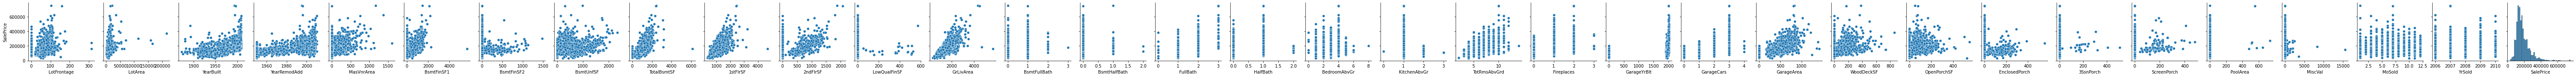

In [34]:
# Now we create a pairplot of all columns against Y as SalePrice
sns.pairplot(train_numeric, x_vars= list(train_numeric.columns), y_vars='SalePrice', aspect=1, kind='scatter')
plt.show()

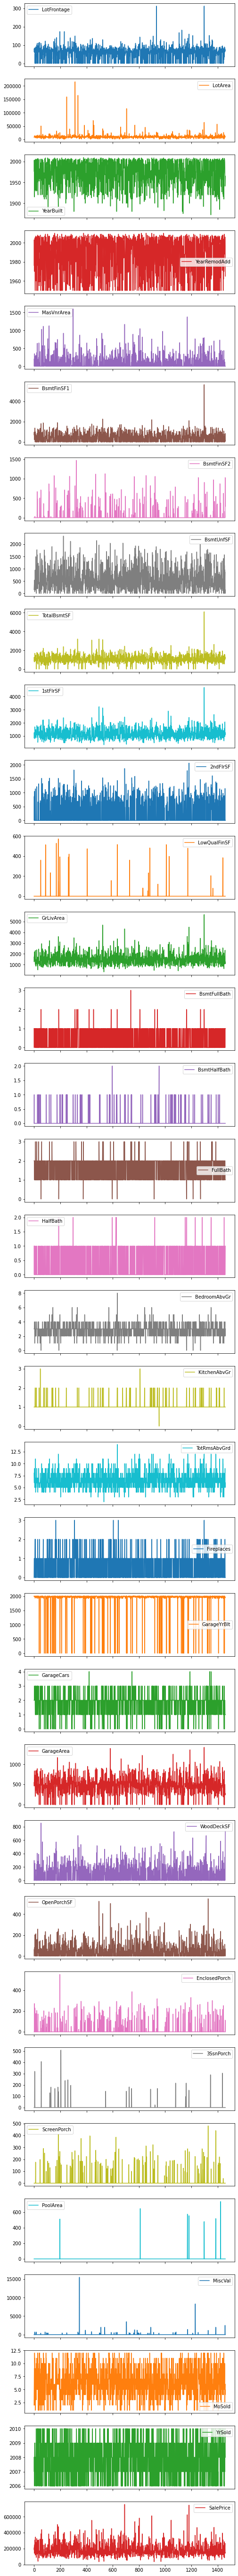

In [35]:
# Plotting all the columns against SalePrice 
train_numeric.plot(subplots=True, figsize=(8, 100)); plt.legend(loc='best')

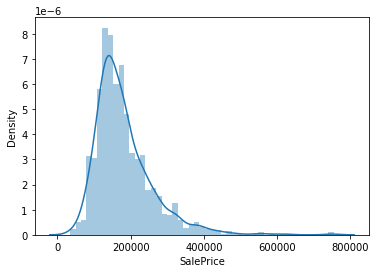

In [36]:
# Analyzing Sale prices
sns.distplot(train_numeric['SalePrice']);

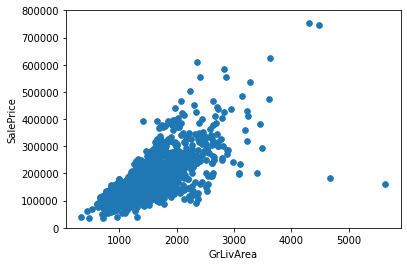

In [37]:
# Analyzing Living area above ground
var = 'GrLivArea'
data = pd.concat([train_numeric['SalePrice'], train_numeric[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);

It shows we have some lumped datasets but 2 House prices are very low given the price

Now we re-check the corelation

In [38]:
cor = train_numeric.corr()

In [39]:
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.100739,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,...,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624
LotArea,0.100739,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.036853,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.078686,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.105010,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.076670,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.009312,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.160829,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.238274,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.245181,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


We got a huge correlation matrix as expected

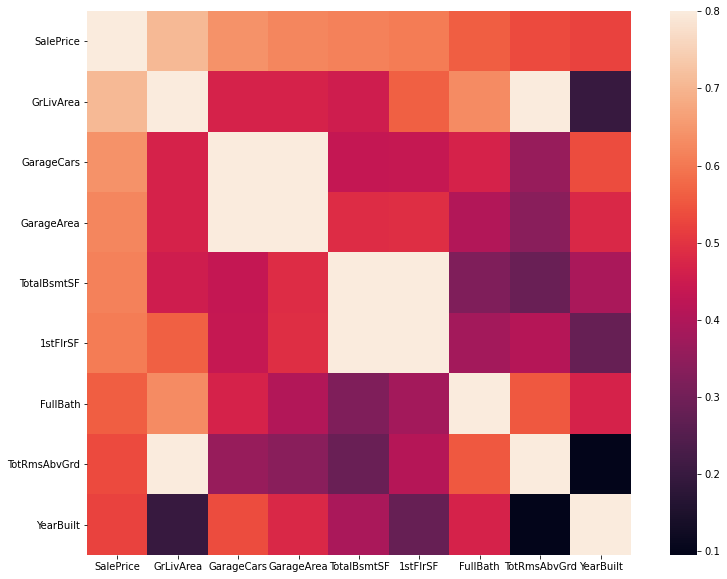

In [40]:
# Plotting Heatmap for top correlated features as the correlation matrix is huge
k = 9 #number of variables for heatmap
cols = cor.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(train_numeric[cols].corr(), vmax=.8, square=True);

**Observation - The 'GrLivArea' is most co-related to SalePrice**

In [41]:
# Merging numeric & categorical cols
categry = list(train_categry.columns)
numeric = list(train_numeric.columns)
df_train = pd.concat([train_numeric, train_categry], axis=1)

In [42]:
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,WD,Abnorml
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal


### 6) Rescaling to fit the data properly.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
df_train[numeric] = scaler.fit_transform(df_train[numeric])

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

### 7) 

**Creating dummies** - One hot encoding

In [46]:
for x in categry:
    tmp = pd.get_dummies(df_train[x], drop_first = True)
    df_train = pd.concat([df_train, tmp], axis = 1)
    df_train.drop([x], axis = 1, inplace = True)

In [47]:
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0.207668,0.033420,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,...,0,0,0,0,1,0,0,0,1,0
1,0.255591,0.038795,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,...,0,0,0,0,1,0,0,0,1,0
2,0.217252,0.046507,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,...,0,0,0,0,1,0,0,0,1,0
3,0.191693,0.038561,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,...,0,0,0,0,1,0,0,0,0,0
4,0.268371,0.060576,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,...,0,0,0,0,1,0,0,0,1,0


**split into X and y**

In [48]:
y = df_train['SalePrice']
X = df_train.drop(['SalePrice'],axis=1)

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 269 entries, LotFrontage to Partial
dtypes: float64(34), uint8(235)
memory usage: 723.0 KB


**Split into train & test**

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

### 8) Model Building and Evaluation

In [51]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

20581515818.91968
[ 8.71929879e-03  2.06374303e-01  8.88005147e-02  7.00282018e-03
  3.35805891e-02  9.75404134e+10  2.54738783e+10  4.03710853e+10
 -1.05593892e+11  3.31388897e+10  1.57025717e+10  4.34957433e+09
 -4.03628331e+10  6.18183613e-03 -3.95524502e-03  8.36658478e-03
 -8.84962082e-03 -2.14653015e-02 -6.28523827e-02 -1.50461197e-02
 -1.60217285e-03  4.84466553e-04  2.20167637e-02  2.40069628e-02
  5.13839722e-03  2.20322609e-02  8.22496414e-03  2.93631554e-02
  1.56797171e-02  9.71717834e-02  2.59714127e-02 -4.62913513e-03
 -1.33514404e-03  4.69446182e-03  8.45432281e-03 -1.48885250e-02
 -3.36074829e-03  6.60324097e-03  7.15637207e-03 -4.15501595e-02
 -6.23178482e-03 -1.45416260e-02  5.70609230e+09  8.25881958e-04
  2.23493576e-03 -1.45602226e-03  7.12147910e+09  5.27879000e-02
  5.60731888e-02  5.49716949e-02  4.91218567e-02  3.41348648e-02
 -1.24359131e-03  3.04460526e-03  9.49430466e-03  7.93457031e-04
 -2.88581848e-03 -8.18634033e-03  4.80461121e-03 -1.67908072e-02
  9.029

In [53]:
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9566958052355786
-2.9808390570368093e+20
0.5328593489020631
1.6203308184058066e+21
0.0005218994602370844
3.6993854301502433e+18


### 9) Ridge and Lasso Regression

#### Ridge

In [99]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,it will not handle the overfitting
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
params = {'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

ridge = Ridge()

# cross validation
from sklearn.model_selection import GridSearchCV

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10}


In [113]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 20.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 4.94536533e-03  1.20323838e-02  7.83190915e-03  1.85016308e-02
  2.19071955e-02  1.35780621e-02  9.83792823e-03  2.03263261e-02
  2.26870681e-02  3.23742261e-02  4.19153081e-02 -1.77813111e-03
  4.26949694e-02  2.01603945e-02  1.62415361e-03  3.66201037e-02
  1.51498772e-02  1.17130454e-02 -5.92721012e-03  3.28757647e-02
  2.71074170e-02  2.26266878e-03  3.38535456e-02  2.50096625e-02
  1.67302265e-02  6.50687398e-03  3.10433331e-03  5.43587603e-03
  6.36939779e-03  3.44775711e-03 -3.05876852e-04 -2.89003640e-03
 -5.48908032e-03 -9.87429457e-03  5.39905604e-04  1.65460625e-03
  4.11441880e-03  1.26652703e-03  8.26812871e-03  4.54103364e-03
 -3.91661618e-03 -3.08853785e-03 -5.64238161e-03 -1.28097474e-02
 -9.46786766e-03 -4.76012635e-03 -6.22332553e-03  5.12605715e-03
  4.19771043e-03  8.20598033e-03 -1.98164222e-03  1.98416473e-03
  2.99893510e-03  4.76796513e-03 -5.31930272e-03 -2.90393825e-03
  6.40710693e-03  8.96020415e-03  1.21740277e-02 -2.22777822e-03
  1.24744576e-02 -1.05197

In [114]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8704448384516756
0.8522505854842074
1.5941799496583737
0.8031394018949098
0.0015613907440336667
0.0018336516024997941


#### Lasso

In [115]:
lasso = Lasso()

lparams = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = lparams, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [117]:
#Fitting model for alpha = 100 and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [118]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7638939255924027
0.7474880442016876
2.905291964556296
1.3726098463117322
0.0028455357145507304
0.0031338124345016718


In [119]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'], 'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.566958e-01,0.870445,0.763894
1,R2 Score (Test),-2.980839e+20,0.852251,0.747488
2,RSS (Train),5.328593e-01,1.594180,2.905292
3,RSS (Test),1.620331e+21,0.803139,1.372610
4,MSE (Train),2.284512e-02,0.039514,0.053344
5,MSE (Test),1.923379e+09,0.042821,0.055980


**Now we tabulate the changes in the coefficients after regularization**

In [120]:
betas = pd.DataFrame(index=X.columns)

In [121]:
betas.rows = X.columns

In [122]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [123]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,8.719299e-03,0.004945,0.000000
LotArea,2.063743e-01,0.012032,0.000000
YearBuilt,8.880051e-02,0.007832,0.000000
YearRemodAdd,7.002820e-03,0.018502,0.023393
MasVnrArea,3.358059e-02,0.021907,0.000000
BsmtFinSF1,9.754041e+10,0.013578,0.000000
BsmtFinSF2,2.547388e+10,0.009838,0.000000
BsmtUnfSF,4.037109e+10,0.020326,0.000000
TotalBsmtSF,-1.055939e+11,0.022687,0.000000
1stFlrSF,3.313889e+10,0.032374,0.000000
